In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [2]:
%cd /content/drive/My Drive/Kaggle/assignment_1

/content/drive/My Drive/Kaggle/assignment_1


In [ ]:
!kaggle datasets download -d noriuk/us-education-datasets-unification-project

In [ ]:
!unzip \*.zip  && rm *.zip

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('states_all_extended.csv')

In [5]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,731634.0,58168.0,56139.0,59481.0,57948.0,58970.0,59929.0,62904.0,58025.0,60590.0,50629.0,44000.0,41167.0,55460.0,8224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,207.0,208.0,204.0,208.0,211.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,253.0,NaN,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,122487.0,11030.0,10585.0,10135.0,9748.0,9896.0,9542.0,9392.0,8789.0,9187.0,7889.0,7057.0,6714.0,10152.0,2371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,673477.0,58914.0,56814.0,55630.0,55433.0,54630.0,53832.0,52793.0,49081.0,51426.0,46790.0,39584.0,37410.0,53497.0,2544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,209.0,215.0,206.0,215.0,213.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,266.0,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,441490.0,34929.0,34517.0,34044.0,34632.0,34740.0,35017.0,37448.0,36011.0,33518.0,32700.0,29244.0,27651.0,33511.0,808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,210.0,208.0,211.0,214.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,257.0,NaN,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,5254844.0,443955.0,436488.0,424961.0,418418.0,410701.0,399776.0,388439.0,363296.0,396482.0,375327.0,329527.0,270675.0,431763.0,59067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,208.0,198.0,209.0,207.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,260.0,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(1715, 266)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 266 entries, PRIMARY_KEY to G08_TR_A_MATHEMATICS
dtypes: float64(263), int64(1), object(2)
memory usage: 3.5+ MB


**Масштабирование данных**

Для масштабирования данных возьмем колонку TOTAL_REVENUE

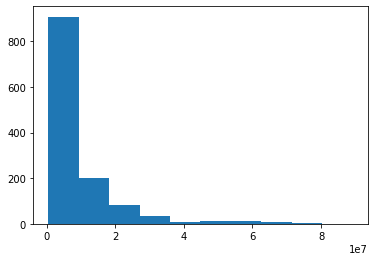

In [8]:
plt.hist(data.TOTAL_REVENUE)
plt.show();

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_total_revenue = scaler.fit_transform(data[['TOTAL_REVENUE']])

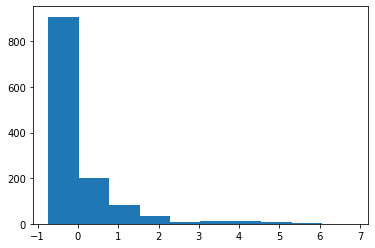

In [10]:
plt.hist(scaled_total_revenue)
plt.show();

In [11]:
data_total_revenue = pd.DataFrame(scaled_total_revenue, columns = ['TOTAL_REVENUE'])
data_total_revenue.head()

,TOTAL_REVENUE
0,-0.546419
1,-0.685023
2,-0.497147
3,-0.628676
4,1.459632


In [12]:
data = data.drop(['TOTAL_REVENUE'], axis='columns')
data = pd.concat([data.iloc[:, :4], data_total_revenue, data.iloc[:, 4:]], axis=1)
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,-0.546419,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,731634.0,58168.0,56139.0,59481.0,57948.0,58970.0,59929.0,62904.0,58025.0,60590.0,50629.0,44000.0,41167.0,55460.0,8224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,207.0,208.0,204.0,208.0,211.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,253.0,NaN,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,-0.685023,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,122487.0,11030.0,10585.0,10135.0,9748.0,9896.0,9542.0,9392.0,8789.0,9187.0,7889.0,7057.0,6714.0,10152.0,2371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,-0.497147,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,673477.0,58914.0,56814.0,55630.0,55433.0,54630.0,53832.0,52793.0,49081.0,51426.0,46790.0,39584.0,37410.0,53497.0,2544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,209.0,215.0,206.0,215.0,213.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,266.0,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,-0.628676,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,441490.0,34929.0,34517.0,34044.0,34632.0,34740.0,35017.0,37448.0,36011.0,33518.0,32700.0,29244.0,27651.0,33511.0,808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,210.0,208.0,211.0,214.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,257.0,NaN,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,1.459632,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,5254844.0,443955.0,436488.0,424961.0,418418.0,410701.0,399776.0,388439.0,363296.0,396482.0,375327.0,329527.0,270675.0,431763.0,59067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,208.0,198.0,209.0,207.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,260.0,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Преобразование категориальных признаков**

In [13]:
data.YEAR.unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 1986, 1987, 1988, 1989, 1990, 1991, 2017, 2019])

In [14]:
data.STATE.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING', 'DODEA', 'NATIONAL'],
      dtype=object)

Произведем категариальное преобразование для колонок YEAR (one hot encoding) и STATE (label encoding).

Так как штатов больше, чем годов, для удобства используем эти два способа именно таким образом.

С помощью метода get_dummies() библиотеки Pandas преобразуем колонку YEAR

In [15]:
data_year_ohe = pd.get_dummies(data=data.YEAR)
data_year_ohe.head()

,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2019
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
data_year_ohe.shape

(1715, 33)

In [17]:
data = data.drop(['YEAR'], axis='columns')
data = pd.concat([data.iloc[:, :2], data_year_ohe, data.iloc[:, 2:]], axis=1)
data.head()

,PRIMARY_KEY,STATE,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2019,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-0.546419,304177.0,1659028.0,715680.0,...,207.0,208.0,204.0,208.0,211.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,253.0,NaN,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-0.685023,106780.0,720711.0,222100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-0.497147,297888.0,1369815.0,1590376.0,...,209.0,215.0,206.0,215.0,213.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,266.0,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-0.628676,178571.0,958785.0,574603.0,...,211.0,210.0,208.0,211.0,214.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,257.0,NaN,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.459632,2072470.0,16546514.0,7641041.0,...,202.0,208.0,198.0,209.0,207.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,260.0,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь используем интсрумент LabelEncoder для кодирования штатов и получим итоговую таблицу

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.STATE = le.fit_transform(data.STATE)
data.head()

,PRIMARY_KEY,STATE,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2019,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-0.546419,304177.0,1659028.0,715680.0,...,207.0,208.0,204.0,208.0,211.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,253.0,NaN,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-0.685023,106780.0,720711.0,222100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-0.497147,297888.0,1369815.0,1590376.0,...,209.0,215.0,206.0,215.0,213.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,266.0,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-0.628676,178571.0,958785.0,574603.0,...,211.0,210.0,208.0,211.0,214.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,257.0,NaN,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.459632,2072470.0,16546514.0,7641041.0,...,202.0,208.0,198.0,209.0,207.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,260.0,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Дополнительное требование**

Построим гистограмму для колонки TOTAL_EXPENDITURE

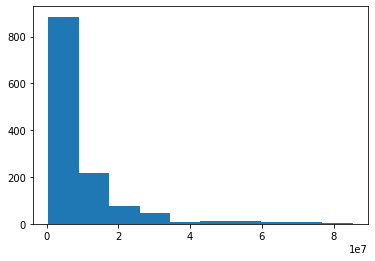

In [19]:
plt.hist(data.TOTAL_EXPENDITURE)
plt.show();